# Classifying hand-written digits with deep learning

## Keras package
Keras is simply a wrapper around more complex numerical computation engines such as TensorFlow and Theano.

Keras abstracts away much of the complexity of building a deep neural network, leaving us with a very simple, nice, and easy to use interface to rapidly build, test, and deploy deep learning architectures.

When it comes to Keras you have two choices for a backend engine — either TensorFlow or Theano. Theano is older than TensorFlow and was originally the only choice when selecting a backend for Keras.
TensorFlow is extremely flexible, allowing you to deploy network computation to multiple CPUs, GPUs, servers, or even mobile systems without having to change a single line of code. Therefore, it is preferable to install Keras on TensorFlow backend.

### Installing Keras on the TensorFlow backend

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
!pip install keras

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5) # Make the figures a bit bigger
from sklearn.datasets import load_digits
from keras.utils import np_utils

Using TensorFlow backend.


## Load training data

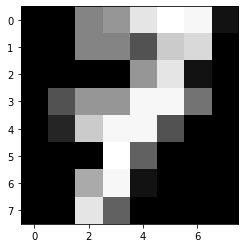

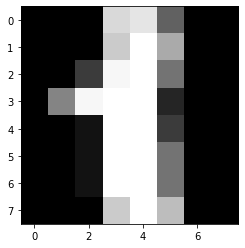

In [2]:
np.random.seed(1125)
nb_classes = 10

# the data, shuffled and split between tran and test sets
digits = load_digits()
X = digits.data
y = digits.target
plt.imshow(X[7].reshape((8,8)), plt.get_cmap('Greys_r'), interpolation='nearest')
plt.show()
plt.imshow(X[1].reshape((8,8)), plt.get_cmap('Greys_r'), interpolation='nearest')

In [3]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
Y_train = np_utils.to_categorical(Y_train, nb_classes) #convert target labels to one-hot vectors
Y_test = np_utils.to_categorical(Y_test, nb_classes)   #convert target labels to one-hot vectors

## Building a simple neural-network with Keras

Source: https://github.com/wxs/keras-mnist-tutorial

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import optimizers
np.random.seed(1125)

# Build the neural network
Build the neural-network. Here we'll do a simple 3 layer fully connected network.

In [21]:
model = Sequential()
model.add(Dense(512, input_shape=(64,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

## Compile the model
Keras is built on top of TensorFlow. This package allows you to define a *computation graph* in Python, which can be compiled and run efficiently on the CPU or GPU without the overhead of the Python interpreter.

When compiing a model, Keras asks you to specify your **loss function** and your **optimizer**. The loss function we'll use here is called *categorical crossentropy*, and is a loss function well-suited to comparing two probability distributions.

Here our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. [More detail at Wikipedia](https://en.wikipedia.org/wiki/Cross_entropy)

The optimizer helps determine how quickly the model learns, how resistent it is to getting "stuck" or "blowing up". Keras provides common optimizer functions as documented [here](https://keras.io/optimizers/)

In [22]:
optimizer = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

## Train the model!
This is the fun part: you can feed the training data loaded in earlier into this model and it will learn to classify digits

In [23]:
model_hist = model.fit(X_train, Y_train,
                       batch_size=64, epochs=20,
                       verbose=1, validation_data=(X_test, Y_test))

Train on 1437 samples, validate on 360 samples
Epoch 1/20
1437/1437 [==============================] - 0s 226us/step - loss: 2.2649 - accuracy: 0.6430 - val_loss: 0.2240 - val_accuracy: 0.9250
Epoch 2/20
1437/1437 [==============================] - 0s 119us/step - loss: 0.2049 - accuracy: 0.9367 - val_loss: 0.1443 - val_accuracy: 0.9444
Epoch 3/20
1437/1437 [==============================] - 0s 119us/step - loss: 0.1326 - accuracy: 0.9562 - val_loss: 0.0937 - val_accuracy: 0.9778
Epoch 4/20
1437/1437 [==============================] - 0s 123us/step - loss: 0.0883 - accuracy: 0.9680 - val_loss: 0.1219 - val_accuracy: 0.9583
Epoch 5/20
1437/1437 [==============================] - 0s 125us/step - loss: 0.0729 - accuracy: 0.9791 - val_loss: 0.1033 - val_accuracy: 0.9750
Epoch 6/20
1437/1437 [==============================] - 0s 122us/step - loss: 0.0569 - accuracy: 0.9812 - val_loss: 0.0877 - val_accuracy: 0.9750
Epoch 7/20
1437/1437 [==============================] - 0s 120us/step - loss:

## Finally, evaluate its performance

Test loss: 0.0672050437020112
Test accuracy: 0.9750000238418579


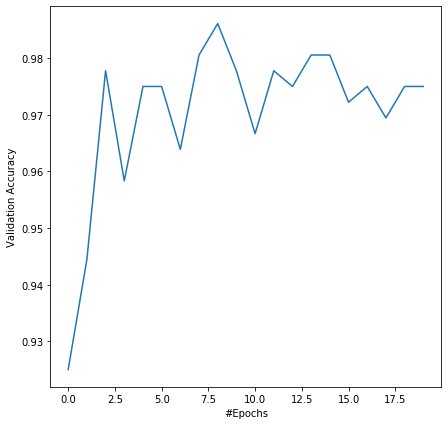

In [24]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.figure(figsize=(7,7))
plt.plot(model_hist.history['val_accuracy']) # or model_hist.history['val_acc'] depending on tf version
plt.xlabel("#Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

### Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [25]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
actual_classes = np.where(Y_test==1)[1]

correct_indices = np.nonzero(predicted_classes == actual_classes)[0]
incorrect_indices = np.nonzero(predicted_classes != actual_classes)[0]

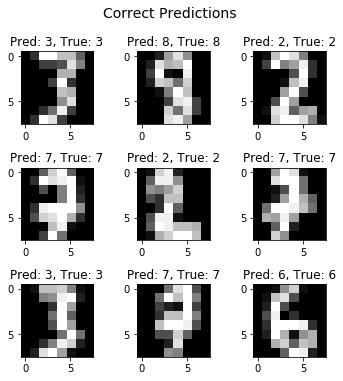

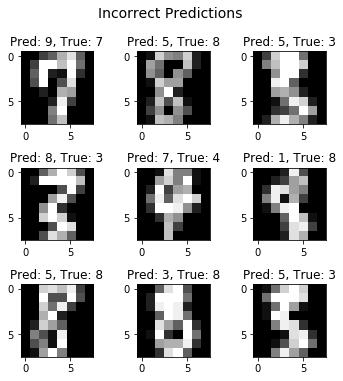

In [26]:
fig, axes = plt.subplots(3, 3, figsize=(5, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test[correct_indices[i]].reshape(8,8), cmap='gray', interpolation='none')
    ax.set_title("Pred: {}, True: {}".format(predicted_classes[correct_indices[i]], actual_classes[correct_indices[i]]))
plt.suptitle('Correct Predictions', y=1.05, size=14)
plt.tight_layout()
    
fig, axes = plt.subplots(2, 3, figsize=(5, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test[incorrect_indices[i]].reshape(8,8), cmap='gray', interpolation='none')
    ax.set_title("Pred: {}, True: {}".format(predicted_classes[incorrect_indices[i]], actual_classes[incorrect_indices[i]]))
plt.suptitle('Incorrect Predictions', y=1.05, size=14)
plt.tight_layout()

# That's all!

There are lots of other great examples at the Keras homepage at http://keras.io and in the source code at https://github.com/fchollet/keras